In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy dataset
data = {
    'age': np.random.randint(20, 90, 6000),  # Age between 20 and 90
    'systolic_blood_pressure': np.random.randint(90, 180, 6000),  # Systolic BP between 90 and 180 mmHg
    'diastolic_blood_pressure': np.random.randint(60, 120, 6000),  # Diastolic BP between 60 and 120 mmHg
    'cholesterol': np.random.randint(150, 300, 6000),  # Cholesterol level between 150 and 300 mg/dL
    'has_retinopathy': np.random.choice([0, 1], 6000)  # 0 or 1 for retinopathy (no/yes)
}

# Create DataFrame
df = pd.DataFrame(data)


In [4]:
df

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
0,71,123,81,176,1
1,34,159,80,222,1
2,80,134,95,246,0
3,40,147,115,239,0
4,43,140,61,193,1
...,...,...,...,...,...
5995,85,172,102,279,1
5996,36,159,80,236,0
5997,87,172,62,274,1
5998,81,166,90,260,0


In [9]:
df.head()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
0,71,123,81,176,1
1,34,159,80,222,1
2,80,134,95,246,0
3,40,147,115,239,0
4,43,140,61,193,1


In [10]:
df.tail()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
5995,85,172,102,279,1
5996,36,159,80,236,0
5997,87,172,62,274,1
5998,81,166,90,260,0
5999,60,115,114,156,1


In [5]:
df.shape

(6000, 5)

**1. Data Overview**

• Features:

– Age: Continuous variable representing the age of the patient.

– Systolic Blood Pressure: Continuous variable for the pressure in the arteries
when the heart beats.

– Diastolic Blood Pressure: Continuous variable for the pressure in the arteries
when the heart rests between beats.

– Cholesterol: Continuous variable for the cholesterol level.

**• Target:**

– Has Retinopathy: Binary variable indicating the presence (1) or absence (0) of
retinopathy

In [7]:
df.describe()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,54.512667,134.994833,89.399000,225.193000,0.497333
std,20.127842,26.127264,17.330566,43.247267,0.500035
min,20.000000,90.000000,60.000000,150.000000,0.000000
25%,37.000000,112.000000,74.000000,189.000000,0.000000
50%,55.000000,136.000000,89.000000,225.000000,0.000000
75%,72.000000,158.000000,105.000000,262.000000,1.000000
max,89.000000,179.000000,119.000000,299.000000,1.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
age,0
systolic_blood_pressure,0
diastolic_blood_pressure,0
cholesterol,0
has_retinopathy,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       6000 non-null   int64
 1   systolic_blood_pressure   6000 non-null   int64
 2   diastolic_blood_pressure  6000 non-null   int64
 3   cholesterol               6000 non-null   int64
 4   has_retinopathy           6000 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


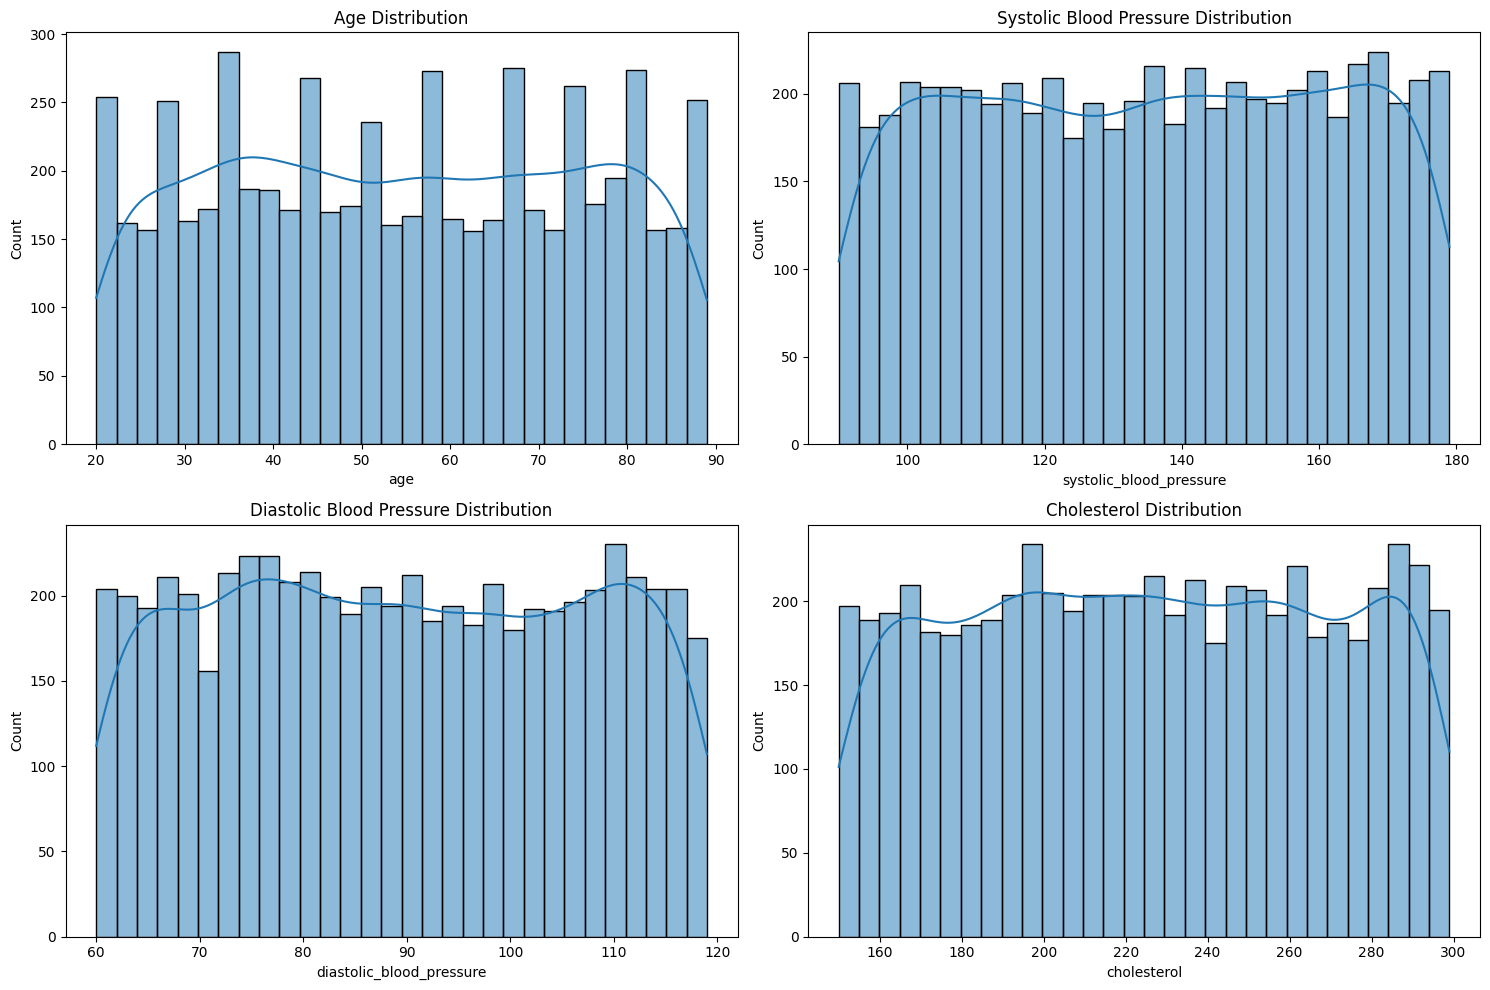

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
sns.histplot(df['systolic_blood_pressure'], bins=30, kde=True,
ax=axes[0, 1])
axes[0, 1].set_title('Systolic Blood Pressure Distribution')
sns.histplot(df['diastolic_blood_pressure'], bins=30, kde=True,
ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Blood Pressure Distribution')
sns.histplot(df['cholesterol'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Cholesterol Distribution')
plt.tight_layout()
plt.show()

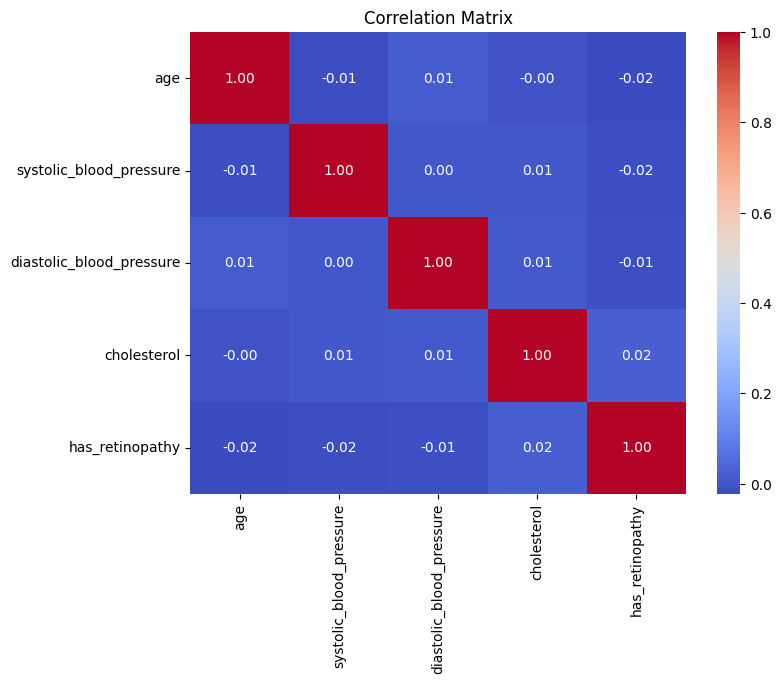

In [17]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

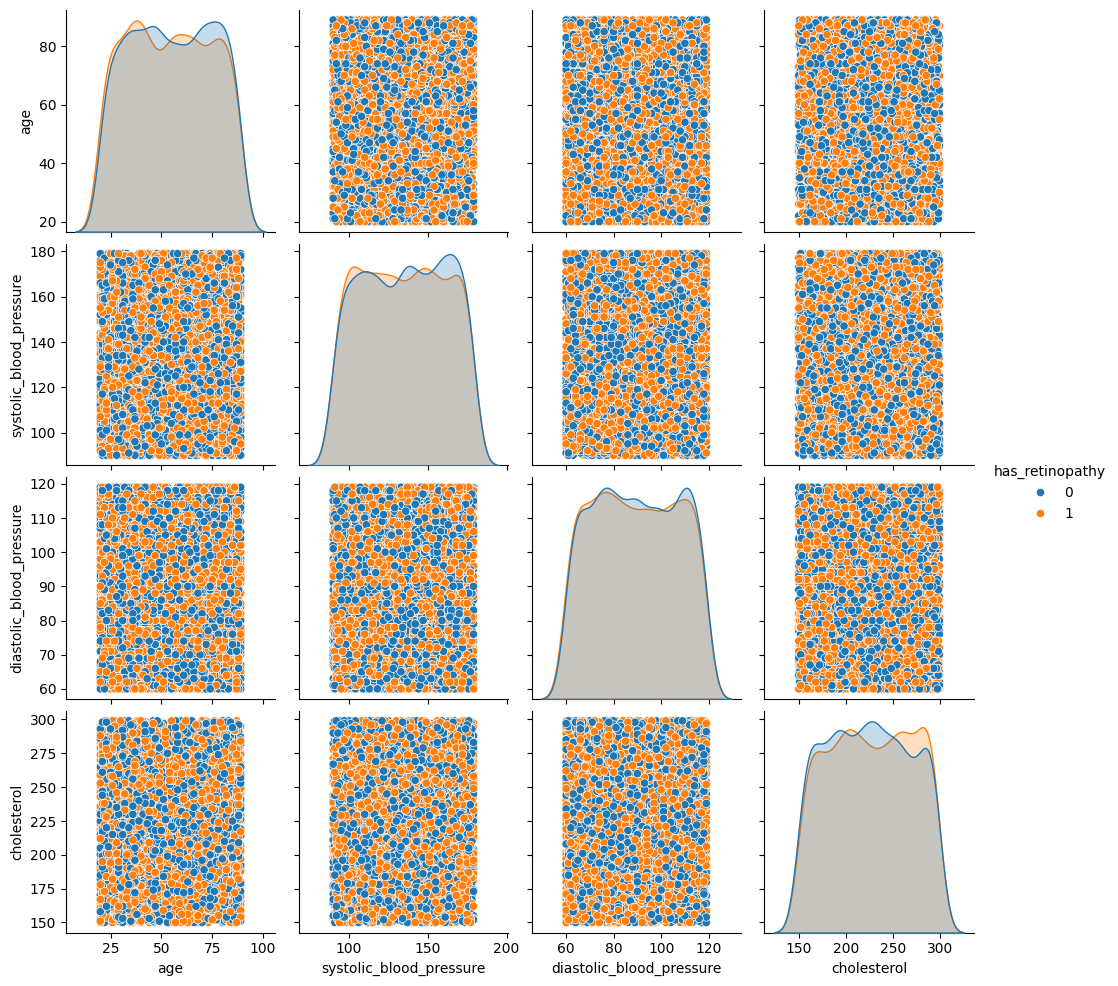

In [18]:
sns.pairplot(df, hue='has_retinopathy')
plt.show()

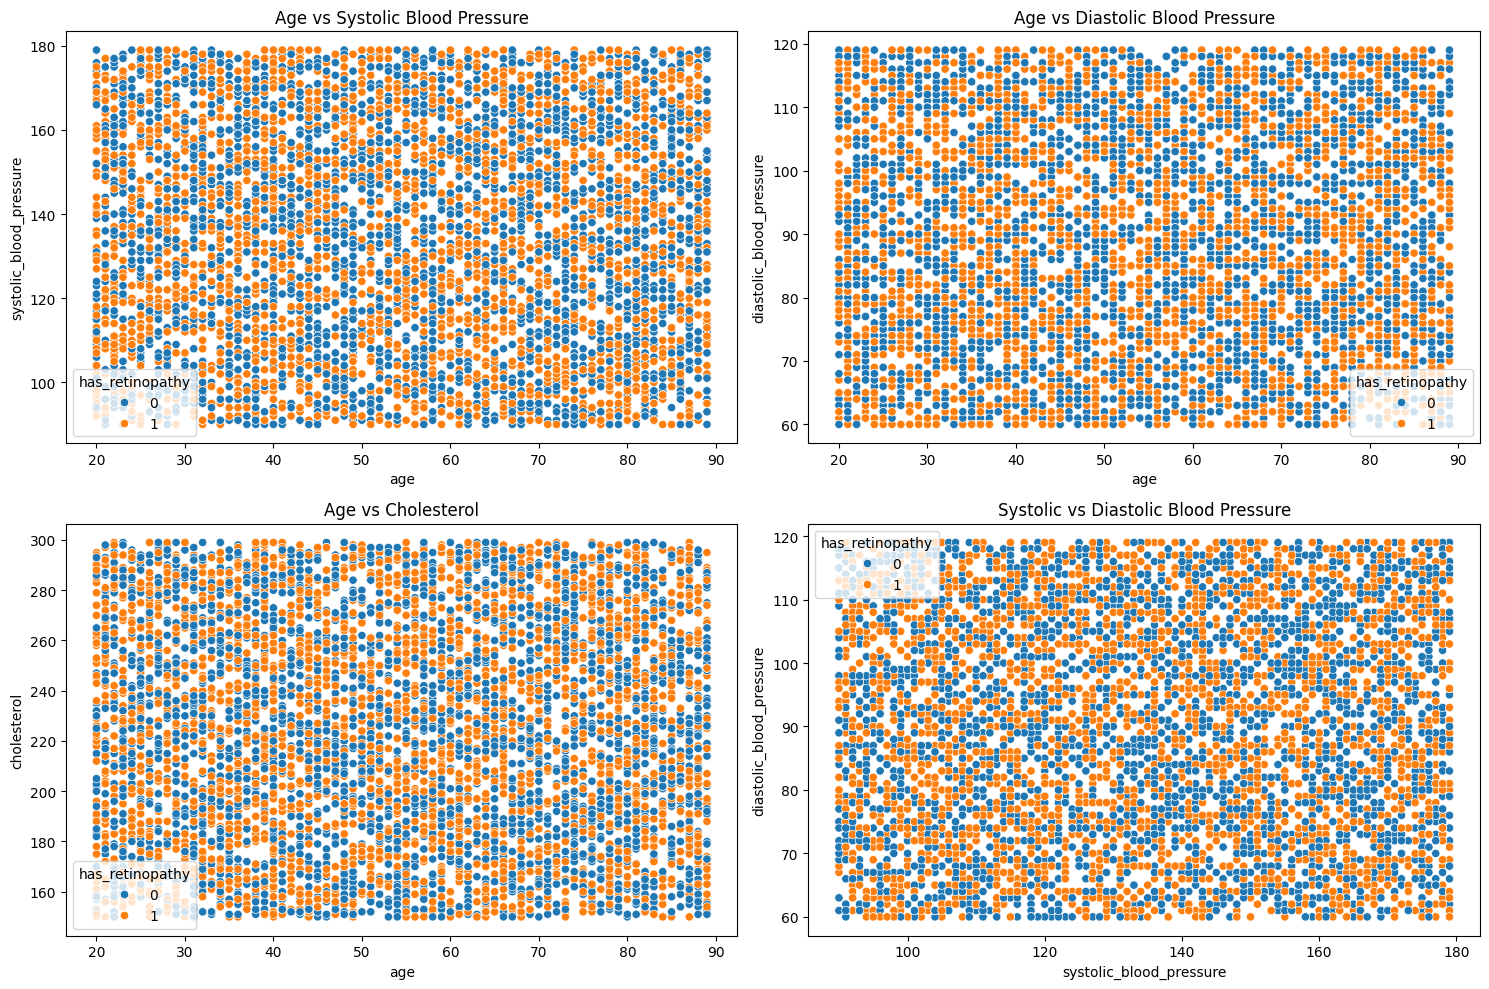

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x='age', y='systolic_blood_pressure',
hue='has_retinopathy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Systolic Blood Pressure')
sns.scatterplot(x='age', y='diastolic_blood_pressure',
hue='has_retinopathy', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Diastolic Blood Pressure')
sns.scatterplot(x='age', y='cholesterol', hue='has_retinopathy',
data=df, ax=axes[1, 0])
axes[1, 0].set_title('Age vs Cholesterol')
sns.scatterplot(x='systolic_blood_pressure',
y='diastolic_blood_pressure', hue='has_retinopathy', data=df,
ax=axes[1, 1])
axes[1, 1].set_title('Systolic vs Diastolic Blood Pressure')
plt.tight_layout()
plt.show()

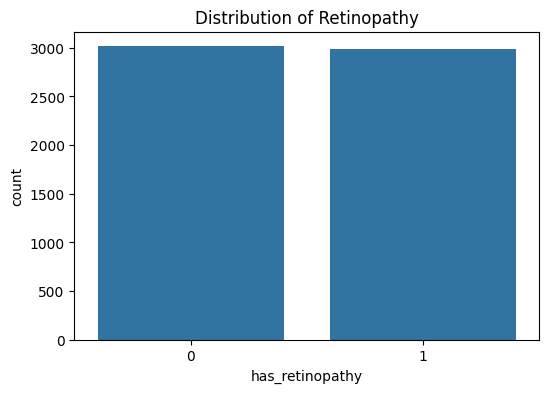

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='has_retinopathy', data=df)
plt.title('Distribution of Retinopathy')
plt.show()

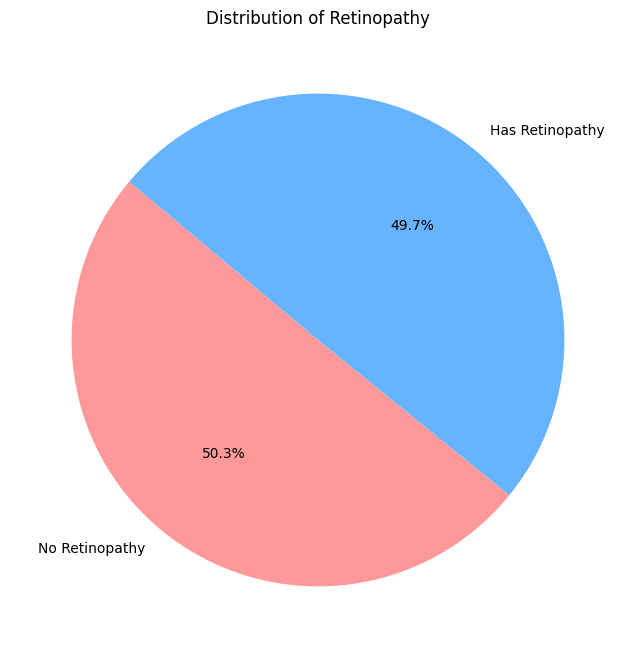

In [21]:
retinopathy_counts = df['has_retinopathy'].value_counts()
labels = ['No Retinopathy', 'Has Retinopathy']
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8, 8))
plt.pie(retinopathy_counts, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Retinopathy')
plt.show()

Logistic Regression Accuracy: 0.5017
SVC Accuracy: 0.4956
Decision Tree Accuracy: 0.4967
Random Forest Accuracy: 0.4883


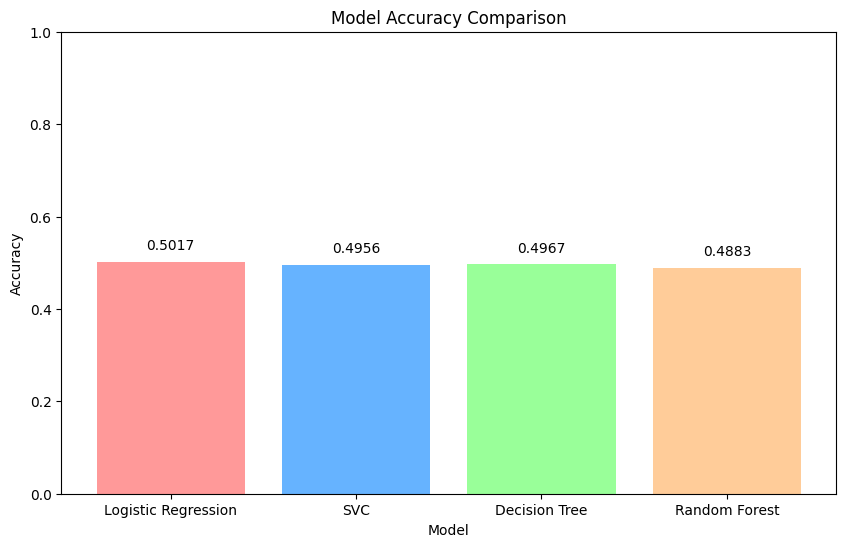

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume df is already defined and contains the necessary columns
X = df[['age', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol']]
y = df['has_retinopathy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy scores
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"SVC Accuracy: {accuracy_svc:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Define the accuracy scores
accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'SVC': accuracy_svc,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom')
plt.show()
